In [4]:
! ls ../data/processed/

2007-1-enwiki-projection-user.csv
2007-1-enwiki-projection-user-roles.csv
2007-2-enwiki-projection-user.csv
2007-2-enwiki-projection-user-roles.csv
2007-3-enwiki-projection-user.csv
2007-3-enwiki-projection-user-roles.csv
2007-4-enwiki-projection-user.csv
2007-4-enwiki-projection-user-roles.csv
all_article_features.csv
all_user_features.csv
enwiki-meta-compact
enwiki-meta-parquet
processed


In [71]:
import pandas as pd

base_path = "../data/processed/"
user_ff = base_path + 'all_user_features.csv'
article_ff = base_path + 'all_article_features.csv'

df = pd.read_csv(user_ff, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,100010,2004-07-01T00:00:00.000-07:00,3,2,0,942,6.848005,13.194870,81.311709,6.694330,...,0,108989229,375,5486568,-5486943,0.6667,0.0000,0.0000,0.0,0
1,1000280,2006-01-01T00:00:00.000-08:00,112,5,62,495105,13.112525,902.029644,3145.839642,134.909578,...,0,156426429,797110,4954705,-5751815,0.0446,0.5536,0.8304,0.0,0
2,1000839,2006-01-01T00:00:00.000-08:00,2,2,0,926,6.830874,12.200618,445.995516,35.496479,...,0,156426429,26637,4961823,-4988460,1.0000,0.0000,0.0000,0.0,0
3,1002185,2006-01-01T00:00:00.000-08:00,1,1,0,3696,8.215006,8.215277,3697.000000,463.000000,...,0,156426429,0,4977318,-4977318,1.0000,0.0000,1.0000,0.0,0
4,1002883,2006-01-01T00:00:00.000-08:00,3,3,3,10335,9.243291,20.625864,968.054231,135.975486,...,0,156426429,4063,4987353,-4991416,1.0000,1.0000,0.3333,0.0,0


In [57]:
df.shape

(1523076, 21)

In [76]:
pd.to_datetime(df.head()[1]).dt.to_period('Q').astype('str')

0    2004Q3
1    2006Q1
2    2006Q1
3    2006Q1
4    2006Q1
Name: 1, dtype: object

In [77]:
quarter = pd.to_datetime(df[1]).dt.to_period('Q').astype('str')
df[quarter == '2007Q1'].head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
36,1019881,2007-01-01T00:00:00.000-08:00,1,1,0,3264,8.090709,8.091015,3265.000000,485.000000,...,0,187962429,0,6440895,-6440895,1.00,0.0000,1.0000,0.0,0
44,1026193,2007-01-01T00:00:00.000-08:00,4,3,0,2588,7.858641,24.961898,513.101903,12.612886,...,0,187962429,5854108,237154,-6091262,0.75,0.0000,0.5000,0.0,0
51,1031928,2007-01-01T00:00:00.000-08:00,2,2,0,990,6.897705,12.263355,460.207562,15.874508,...,0,187962429,544,4505545,-4506089,1.00,0.0000,0.0000,0.0,1
80,1050418,2007-01-01T00:00:00.000-08:00,2,1,0,72,4.276666,7.221105,36.986484,2.449490,...,0,187962429,273,3933140,-3933413,0.50,0.0000,0.0000,0.0,0
110,1073482,2007-01-01T00:00:00.000-08:00,3,3,1,5624,8.634798,22.058689,1560.710531,102.446333,...,0,187962429,201802,7046206,-7248008,1.00,0.3333,0.6667,0.0,1


In [78]:
! head ../data/processed/2007-1-enwiki-projection-user-roles.csv 

--roles (node ID role ID)--

1	1
1993024	1
2138537	3
1554195	1
737021	1
3451462	3
211165	1
1512459	6


In [81]:
role_features = base_path + '2007-1-enwiki-projection-user-roles.csv'
role_df = pd.read_csv(role_features, header=None, skiprows=2, sep='\t')
role_df.head()

,0,1
0,1,1
1,1993024,1
2,2138537,3
3,1554195,1
4,737021,1


In [128]:
user_df = df[quarter == '2007Q1'].drop([1, df.columns[-1]], axis=1)
joined = user_df.merge(role_df, on=0, how='left')
joined.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,1
0,1019881,1,1,0,3264,8.090709,8.091015,3265.000000,485.000000,1,0,187962429,0,6440895,-6440895,1.00,0.0000,1.0000,0.0,NaN
1,1026193,4,3,0,2588,7.858641,24.961898,513.101903,12.612886,2,0,187962429,5854108,237154,-6091262,0.75,0.0000,0.5000,0.0,5.0
2,1031928,2,2,0,990,6.897705,12.263355,460.207562,15.874508,0,0,187962429,544,4505545,-4506089,1.00,0.0000,0.0000,0.0,NaN
3,1050418,2,1,0,72,4.276666,7.221105,36.986484,2.449490,0,0,187962429,273,3933140,-3933413,0.50,0.0000,0.0000,0.0,NaN
4,1073482,3,3,1,5624,8.634798,22.058689,1560.710531,102.446333,2,0,187962429,201802,7046206,-7248008,1.00,0.3333,0.6667,0.0,5.0


In [110]:
role_df.shape

(115699, 2)

In [109]:
joined.shape

(221306, 22)

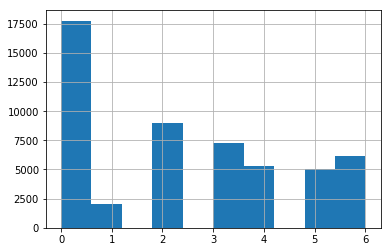

In [101]:
import matplotlib.pyplot as plt
joined[1].hist()
plt.show()

In [103]:
joined[1].unique()

array([nan,  5.,  0.,  3.,  2.,  4.,  6.,  1.])

In [129]:
joined[joined.columns[-1]].head()

0    NaN
1    5.0
2    NaN
3    NaN
4    5.0
Name: 1, dtype: float64

In [130]:
from sklearn.preprocessing import OneHotEncoder

roles = joined[joined.columns[-1]].fillna(-1)

enc = OneHotEncoder(handle_unknown='ignore')
x = enc.fit_transform(roles.values.reshape([-1, 1]))

In [136]:
X = user_df.drop([0, user_df.columns[-1]], axis=1).values

In [146]:
x.todense().shape

(221306, 8)

In [148]:
X.shape

(221306, 17)

In [150]:
import numpy as np
np.concatenate((X, x.todense()), axis=1).shape

(221306, 25)

In [152]:
user_df.columns

Int64Index([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')